<a href="https://colab.research.google.com/github/JinGunseon/APS/blob/main/%EC%8B%A4%EC%8A%B5_pandas%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%88%98%EC%9D%B5%EB%A5%A0_%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Returns (수익률)

- 가격(Prices)의 수익률(Returns) 변환

- 수익률 계산 및 수익률 시퀀스를 복리화

## 1. Simple Returns (단순 수익률)

$t$ 시간에서 ${t+1}$ 시간까지의 Return은 다음과 같이 계산됩니다. 나중가격  / 이전가격 - 1

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} = \frac{P_{t+1}}{P_{t}} - 1 $$


주식 a 의 3일간의 가격 변화

In [9]:
!pip install --upgrade finance-datareader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [finance-datareader]


In [10]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

주식 a의 일일 수익률

In [11]:
prices_a[1:] # 당일가격

array([8.91, 8.71])

In [12]:
prices_a[:-1] # 전일가격

array([8.7 , 8.91])

In [14]:
(prices_a[1:]-prices_a[:-1])/prices_a[:-1]

array([ 0.02413793, -0.02244669])

이제 가격을 며칠 더 추가하고 두 번째 주식을 소개합니다. 이 두 주식을 "BLUE"와 "ORANGE"라고 부르고 Pandas DataFrame을 사용하여 다음과 같이 표시합니다.

In [15]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                        "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


- 일일 수익률 계산
$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [18]:
prices.iloc[1:]/prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


위와 동일한 결과를  `.shift()` 메서드를 이용하여 쉽게 구할 수 있습니다.   

In [19]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


- 전날의 종가가 없기 때문에 첫날의 수익을 계산할 수 없다는 점에 유의

- 일반적으로 가격에서 수익으로 이동할 때 하나의 데이터 포인트를 잃음

- DataFrame에는 한 행에서 다른 행으로의 백분율 변경을 계산하는 기본 제공 메서드가 있습니다. 이 방법을 사용하여 수익률을 위의 방법보다 더 쉽게 계산할 수 있습니다.

In [16]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


### 수익률 평균, 표준편차
- 12 개월 가격

In [20]:
prices = pd.read_csv('sample_data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


- 월별 수익률

In [21]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


- 평균 수익률

In [22]:
returns.mean()

,0
BLUE,0.01
ORANGE,0.01


- 수익률 표준 편차

In [23]:
returns.std()

,0
BLUE,0.023977
ORANGE,0.079601


- 12 개월 수익률 변화 시각화  
- 평균 수익률은 같으나 변동성이 크게 다르므로, 평균 수익률 (average return)은 주식 평가의 좋은 지표가 아님.

<Axes: >

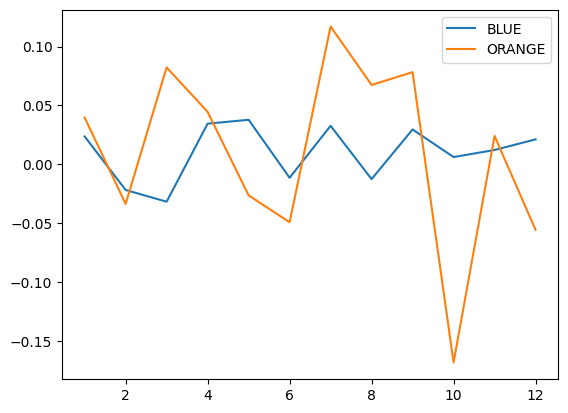

In [24]:
returns.plot()

<Axes: >

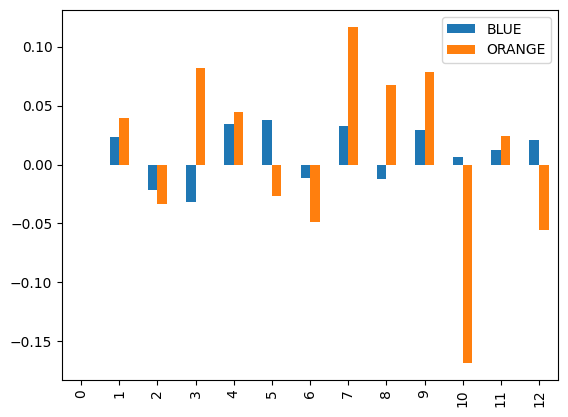

In [25]:
returns.plot.bar()

## 2. Compounding Returns (복리 수익률)

- 이제 일련의 12개월 수익률이 있으므로 수익률이 `1+R` 형식이라고 부르는 성장률(Growth Rate)로 표현되는 한 개별 기간 수익률을 곱하여 복리 수익률을 산출할 수 있습니다.

- CAGR(Compound Annual Growth Rate, 연평균 성장률, 연복리 수익률) 계산 공식  

    방법 1. 매(일, 월)별 수익률로 계산
    $$CAGR = ( 1 + 누적수익률 ) ^ \frac{1}{투자기간연수}- 1$$
        - 복리 수익률은 각 수익률에 1을 더한 다음 모두 곱하기만 하면 됩니다. 결과는 1+R 형식이므로 1을 빼야 합니다.  
        
    방법 2.  시초 가격과 최종 가격, 투자 기간으로 계산
    
$$CAGR = \left(\frac{현재자산}{과거자산}\right)^{\frac{1}{투자기간연수}} - 1$$





두 시리즈의 복리 수익률을 계산해 보겠습니다.

매월의 수익률

In [26]:
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


방법 1로 복리 수익률 계산

In [28]:
(1+returns).prod() -1

,0
BLUE,0.123310
ORANGE,0.087167


위 경우,  평균 수익률은 동일하나 복리 수익률은 차이가 많이 납니다.

방법 2로 복리 수익률 계산

In [34]:
prices['BLUE'].values[0],prices['BLUE'].values[-1] # BLUE의 최초가격과 최종가격
(prices['BLUE'].values[-1] / prices['BLUE'].values[0]) -1

np.float64(0.1233103448275863)

In [35]:
prices['ORANGE'].values[0],prices['ORANGE'].values[-1] # ORANGE 최초가격과 최종가격
(prices['ORANGE'].values[-1] / prices['ORANGE'].values[0]) -1

np.float64(0.08716697936210127)

두 방법의 결과가 동일함을 확인

## 3. Annualizing Returns (연간 수익률)

일정 기간 동안의 수익률을 연간으로 계산하려면 1년의 기간만큼 수익률을 복리화합니다.

월별 수익 $R_m$을 연간으로 환산하는 공식은 다음과 같습니다.

$$ (1+R_m)^{12} - 1$$

분기별 수익 $R_q$를 연간으로 환산하면 다음을 얻을 수 있습니다.

$$ (1+R_q)^{4} - 1$$

마지막으로 일일 수익 $R_d$를 연간으로 환산하면 다음을 얻을 수 있습니다.

$$ (1+R_d)^{252} - 1$$

예를 들어, 월별 1%, 분기별 4% 및 일일 수익률 0.01%를 연간화하려면 다음을 수행합니다.

In [36]:
rm = 0.01  #월별 1%

(1+rm)**12 - 1  #월별 수익률을 연간으로 환산

0.12682503013196977

In [37]:
rq = 0.04  #분기별 수익률
(1+rq)**4 - 1   #분기별 수익률을 연간으로 환산

0.1698585600000002

### 주식 수익률 (Return) 계산

In [49]:
df = fdr.DataReader("AAPL", start="2022-06-01", end="2022-07-01")
df.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
df

,Close
2022-06-01,148.710007
2022-06-02,151.210007
2022-06-03,145.380005
2022-06-06,146.139999
2022-06-07,148.710007
2022-06-08,147.960007
2022-06-09,142.639999
2022-06-10,137.130005
2022-06-13,131.880005
2022-06-14,132.759995


### simple return 계산

In [50]:
df['Return'] = df['Close'].pct_change()
df

,Close,Return
2022-06-01,148.710007,NaN
2022-06-02,151.210007,0.016811
2022-06-03,145.380005,-0.038556
2022-06-06,146.139999,0.005228
2022-06-07,148.710007,0.017586
2022-06-08,147.960007,-0.005043
2022-06-09,142.639999,-0.035956
2022-06-10,137.130005,-0.038629
2022-06-13,131.880005,-0.038285
2022-06-14,132.759995,0.006673


### 누적 수익률 (Cumulative Return)
방법 1 : 매일(달)의 수익률로 계산  
누적 수익률 = (1+당일 수익률) * (전일자 누적 수익률)  
$$i_t = (1 + r_t) * i_{t-1}$$

방법 2: 처음, 마지막 가격으로 계산  
누적 수익률 = $\left( \frac{현재가격}{과거가격} \right) - 1$

- 누적 수익률은 단순 덧셈이 아닌 곱셉으로 계산  

ex) 10000원이었던 주식이 첫째 달에 10% 상승하고 둘째 달에 20% 상승하게 된다면 누적 수익률은 30%가 아닌, 32%

|기존|10,000원|0%|
|-----|----|----|
|첫째달|11,000원|10%상승|
|둘째달|13,200원|20%상승|
|누적수익률| |32%상승|

$$(1+0.2)*(1+0.1)-1$$

방법 1 :  (1+당일 수익률) * (전일자 누적 수익률)

In [40]:
(1+0.2)*(1+0.1) -1

0.32000000000000006

방법 2: (현재가격/과거가격) - 1

In [41]:
(13200/10000) -1

0.32000000000000006

주식의 daily 누적 수익률

In [51]:
df['Cum Return'] = (1+df['Return']).cumprod() -1
df

,Close,Return,Cum Return
2022-06-01,148.710007,NaN,NaN
2022-06-02,151.210007,0.016811,1.681124e-02
2022-06-03,145.380005,-0.038556,-2.239259e-02
2022-06-06,146.139999,0.005228,-1.728201e-02
2022-06-07,148.710007,0.017586,-2.220446e-16
2022-06-08,147.960007,-0.005043,-5.043373e-03
2022-06-09,142.639999,-0.035956,-4.081775e-02
2022-06-10,137.130005,-0.038629,-7.786969e-02
2022-06-13,131.880005,-0.038285,-1.131733e-01
2022-06-14,132.759995,0.006673,-1.072558e-01


In [53]:
df['Close'].iloc[-1]/df['Close'].iloc[0] -1

np.float64(-0.08062675645112449)

## 5. Log Returns (로그 수익률)

$$Log 수익률 = log⁡(나중가격/이전가격)  = log(나중가격) – log(이전가격)$$

$$R_t = \log{(P_{t+1}/P_t)} = \log{P_{t+1}} - \log{P_t}$$

- 자산 가격의 변화 : 100 $\rightarrow$ 130 $\rightarrow$ 100

In [54]:
(130 - 100) / 100 + (100-130) /130

0.0692307692307692

- 일별 로그 수익률

In [55]:
np.log(130)-np.log(100) + np.log(100) - np.log(130)

np.float64(0.0)

In [56]:
df['Prev_Close'] = df['Close'].shift()
df

,Close,Return,Cum Return,Prev_Close
2022-06-01,148.710007,NaN,NaN,NaN
2022-06-02,151.210007,0.016811,1.681124e-02,148.710007
2022-06-03,145.380005,-0.038556,-2.239259e-02,151.210007
2022-06-06,146.139999,0.005228,-1.728201e-02,145.380005
2022-06-07,148.710007,0.017586,-2.220446e-16,146.139999
2022-06-08,147.960007,-0.005043,-5.043373e-03,148.710007
2022-06-09,142.639999,-0.035956,-4.081775e-02,147.960007
2022-06-10,137.130005,-0.038629,-7.786969e-02,142.639999
2022-06-13,131.880005,-0.038285,-1.131733e-01,137.130005
2022-06-14,132.759995,0.006673,-1.072558e-01,131.880005


In [57]:
df['Log Return'] = np.log(df['Close'])-np.log(df['Prev_Close'])
df

,Close,Return,Cum Return,Prev_Close,Log Return
2022-06-01,148.710007,NaN,NaN,NaN,NaN
2022-06-02,151.210007,0.016811,1.681124e-02,148.710007,0.016671
2022-06-03,145.380005,-0.038556,-2.239259e-02,151.210007,-0.039319
2022-06-06,146.139999,0.005228,-1.728201e-02,145.380005,0.005214
2022-06-07,148.710007,0.017586,-2.220446e-16,146.139999,0.017433
2022-06-08,147.960007,-0.005043,-5.043373e-03,148.710007,-0.005056
2022-06-09,142.639999,-0.035956,-4.081775e-02,147.960007,-0.036618
2022-06-10,137.130005,-0.038629,-7.786969e-02,142.639999,-0.039395
2022-06-13,131.880005,-0.038285,-1.131733e-01,137.130005,-0.039037
2022-06-14,132.759995,0.006673,-1.072558e-01,131.880005,0.006650


In [58]:
df['Log Return2'] = np.log(df['Close'])-np.log(df['Close'].shift())
df

,Close,Return,Cum Return,Prev_Close,Log Return,Log Return2
2022-06-01,148.710007,NaN,NaN,NaN,NaN,NaN
2022-06-02,151.210007,0.016811,1.681124e-02,148.710007,0.016671,0.016671
2022-06-03,145.380005,-0.038556,-2.239259e-02,151.210007,-0.039319,-0.039319
2022-06-06,146.139999,0.005228,-1.728201e-02,145.380005,0.005214,0.005214
2022-06-07,148.710007,0.017586,-2.220446e-16,146.139999,0.017433,0.017433
2022-06-08,147.960007,-0.005043,-5.043373e-03,148.710007,-0.005056,-0.005056
2022-06-09,142.639999,-0.035956,-4.081775e-02,147.960007,-0.036618,-0.036618
2022-06-10,137.130005,-0.038629,-7.786969e-02,142.639999,-0.039395,-0.039395
2022-06-13,131.880005,-0.038285,-1.131733e-01,137.130005,-0.039037,-0.039037
2022-06-14,132.759995,0.006673,-1.072558e-01,131.880005,0.006650,0.006650


### 누적 로그 수익률
- 로그 수익률은 cumsum() 사용  
- 단순히 daily return 을 더하면 기간 전체의 복리로 계산된 누적 수익률이 계산됨

- 누적 로그 수익률

$$1 + r = \log{\frac{p_t}{p_0}}$$

- 로그 수익률: 복리로 반영  
- 단순 수익률 : 단리로 반영

In [59]:
df['Cum Log Return'] = df['Log Return'].cumsum()
df

,Close,Return,Cum Return,Prev_Close,Log Return,Log Return2,Cum Log Return
2022-06-01,148.710007,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-02,151.210007,0.016811,1.681124e-02,148.710007,0.016671,0.016671,0.016671
2022-06-03,145.380005,-0.038556,-2.239259e-02,151.210007,-0.039319,-0.039319,-0.022647
2022-06-06,146.139999,0.005228,-1.728201e-02,145.380005,0.005214,0.005214,-0.017433
2022-06-07,148.710007,0.017586,-2.220446e-16,146.139999,0.017433,0.017433,0.000000
2022-06-08,147.960007,-0.005043,-5.043373e-03,148.710007,-0.005056,-0.005056,-0.005056
2022-06-09,142.639999,-0.035956,-4.081775e-02,147.960007,-0.036618,-0.036618,-0.041674
2022-06-10,137.130005,-0.038629,-7.786969e-02,142.639999,-0.039395,-0.039395,-0.081069
2022-06-13,131.880005,-0.038285,-1.131733e-01,137.130005,-0.039037,-0.039037,-0.120106
2022-06-14,132.759995,0.006673,-1.072558e-01,131.880005,0.006650,0.006650,-0.113455


In [60]:
np.log(df['Close'].iloc[-1] / df['Close'].iloc[0])

np.float64(-0.08406309811214803)

## 연습 문제

1) 1,000,000 원을 수익률 10%로 10년, 20년, 30년 투자할 때 원금+수익 금액은 ?

In [70]:
print("{:,.2f}".format(1_000_000*(1+0.1)**10))

2,593,742.46


In [71]:
print("{:,.2f}".format(1_000_000*(1+0.1)**20))
print("{:,.2f}".format(1_000_000*(1+0.1)**30))

6,727,499.95
17,449,402.27


2) 10,000 원을 10 년간 투자했는데 100,000 이 되었다. 누적 수익률과 CAGR 은  ?

In [73]:
# 누적 수익률
print((100_000/10_000) -1)
# CAGR
print((100_000/10_000) ** (1/10) -1)

9.0
0.2589254117941673


3) 애플 주식이 100불에서 10년 뒤 300 불이 되었다면 누적수익률과 CAGR 은 ?

In [74]:
# 누적 수익률
print((300/100) -1)
# CAGR
print((300/100) ** (1/10) -1)

2.0
0.11612317403390437


## 72의 법칙
원금이 2 배가 되는데 걸리는 시간 = 72/CAGR  

ex) 10_000 원을 CAGR 10% 로 운용하면 72/10 = 7.2 년 후 원금이 2 배가 된다.

CAGR 20% 인 경우

In [75]:
72/20

3.6

CAGR 30% 인 경우

In [76]:
72/30

2.4